<>:49: SyntaxWarning: invalid escape sequence '\['
<>:49: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/197118095.py:49: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/197118095.py:42: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:9

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6514 - loss: 0.6431 - val_accuracy: 0.7998 - val_loss: 0.4558
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8033 - loss: 0.4378 - val_accuracy: 0.8299 - val_loss: 0.3982
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8456 - loss: 0.3623 - val_accuracy: 0.8660 - val_loss: 0.3324
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8687 - loss: 0.3174 - val_accuracy: 0.8798 - val_loss: 0.3084
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8921 - loss: 0.2783 - val_accuracy: 0.8956 - val_loss: 0.2734
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9074 - loss: 0.2380 - val_accuracy: 0.9119 - val_loss: 0.2482
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9273 - loss: 0.1996 - val_accuracy: 0.9241 - val_loss: 0.2123
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9378 - loss: 0.1736 - val_accuracy: 0.9302 - v

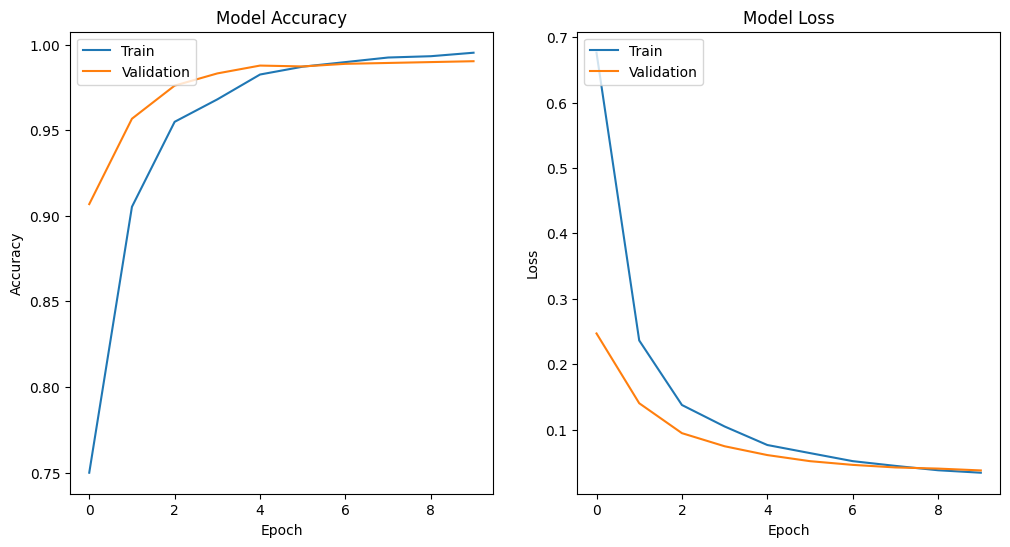

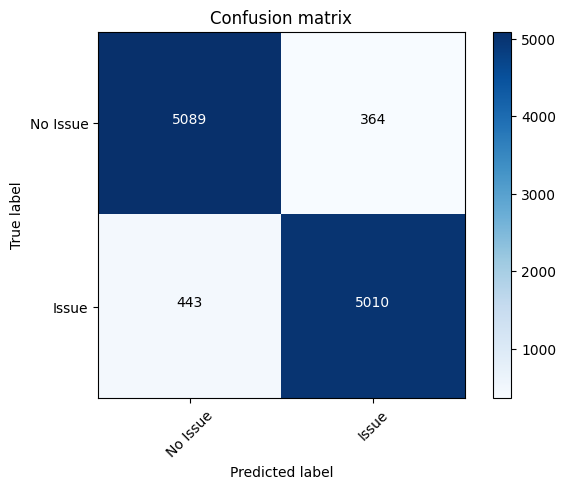

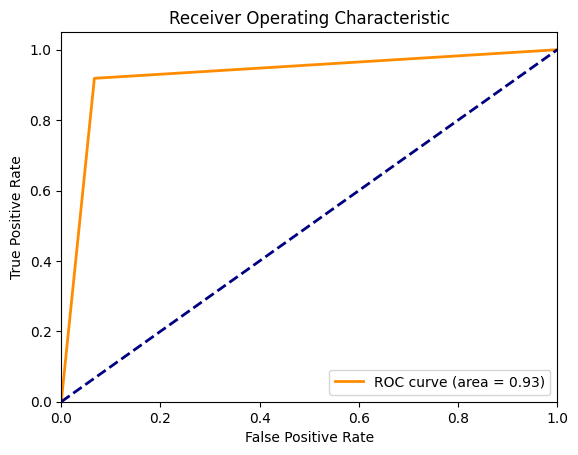

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5453
           1       0.93      0.92      0.93      5453

    accuracy                           0.93     10906
   macro avg       0.93      0.93      0.93     10906
weighted avg       0.93      0.93      0.93     10906



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Load your dataset
# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
dataset = dataset.dropna(subset=['Have_Issue'])
dataset = dataset.dropna(subset=['Base_Reviews'])
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = cnn_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = cnn_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

def plot_history(history):
    plt.figure(figsize=(12, 6))
    
    # Plot for model accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot for model loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Save the figure
    plt.savefig('training_and_validation_accuracy.png', dpi=300)
    
    # Display the figure
    plt.show()

plot_history(history)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix_cnn.png', dpi=300)  # Corrected indentation
    plt.show()

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('ROC_cnn.png', dpi=300)  # Corrected indentation
    plt.show()


# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Issue", "Issue"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/2698106174.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')


Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/2698106174.py:41: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.6230 - loss: 0.6444 - val_accuracy: 0.7855 - val_loss: 0.4764
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8083 - loss: 0.4383 - val_accuracy: 0.8456 - val_loss: 0.3725
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8339 - loss: 0.3770 - val_accuracy: 0.8512 - val_loss: 0.3401
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8577 - loss: 0.3305 - val_accuracy: 0.8793 - val_loss: 0.2974
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8932 - loss: 0.2781 - val_accuracy: 0.8976 - val_loss: 0.2665
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9175 - loss: 0.2283 - val_accuracy: 0.9165 - val_loss: 0.2455
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9279 - loss: 0.2015 - val_accuracy: 0.9134 - val_loss: 0.2344
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9389 - loss: 0.1798 - val_accuracy: 0.9363 - v

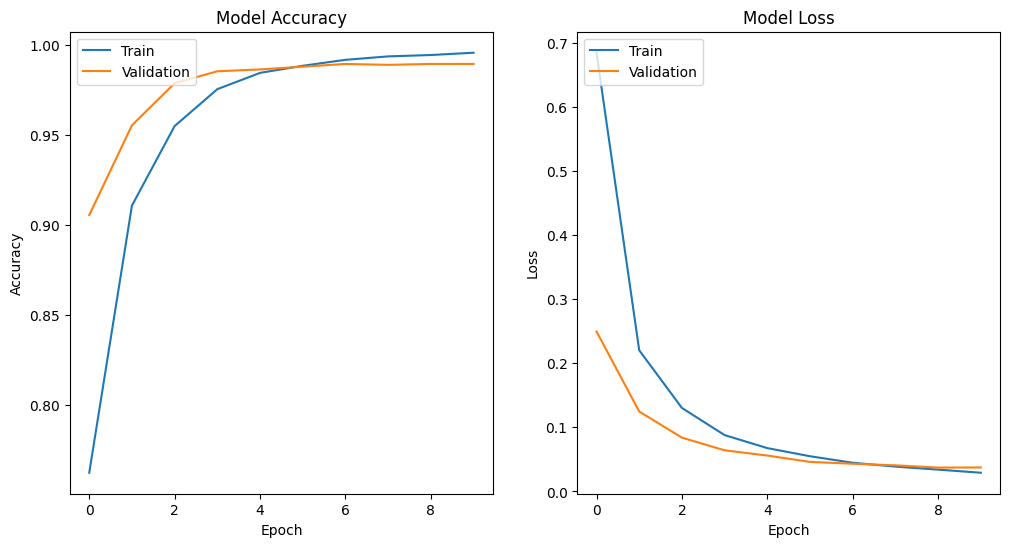

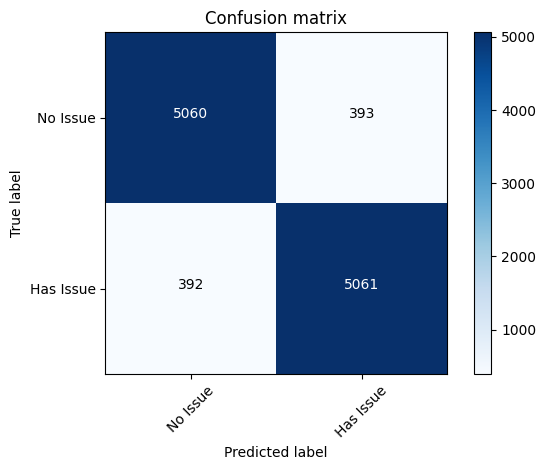

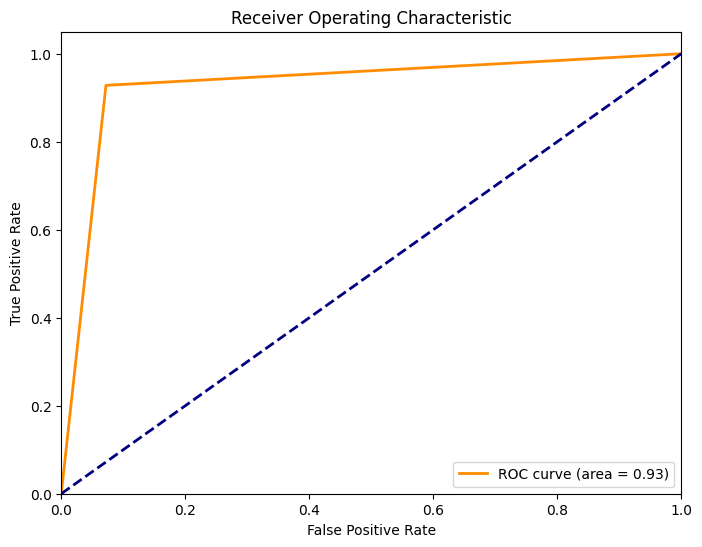

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler  # Oversampling (used here instead of undersampling)
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
#dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

# Lemmatize text based on POS tagging
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']

# Using RandomOverSampler to balance classes
oversampler = RandomOverSampler(random_state=42)
X_resampled_over, y_resampled_over = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency_over(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = cnn_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=20, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = cnn_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history_over, all_predictions_over, all_actuals_over = get_dataset_words_frequency_over(X_resampled_over, y_resampled_over, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history_over)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(all_actuals_over, all_predictions_over, ['No Issue', 'Has Issue'])

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curve
plot_roc_curve(all_actuals_over, all_predictions_over)


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/3021909569.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/3021909569.py:41: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the fi

Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6497 - loss: 0.6414 - val_accuracy: 0.8039 - val_loss: 0.4464
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7935 - loss: 0.4514 - val_accuracy: 0.8477 - val_loss: 0.3588
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8461 - loss: 0.3610 - val_accuracy: 0.8507 - val_loss: 0.3469
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8785 - loss: 0.3038 - val_accuracy: 0.8961 - val_loss: 0.2846
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8971 - loss: 0.2718 - val_accuracy: 0.8910 - val_loss: 0.2746
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9212 - loss: 0.2264 - val_accuracy: 0.9002 - val_loss: 0.2563
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9292 - loss: 0.1984 - val_accuracy: 0.9333 - val_loss: 0.2027
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9460 - loss: 0.1630 - val_accuracy: 0.9424 - v

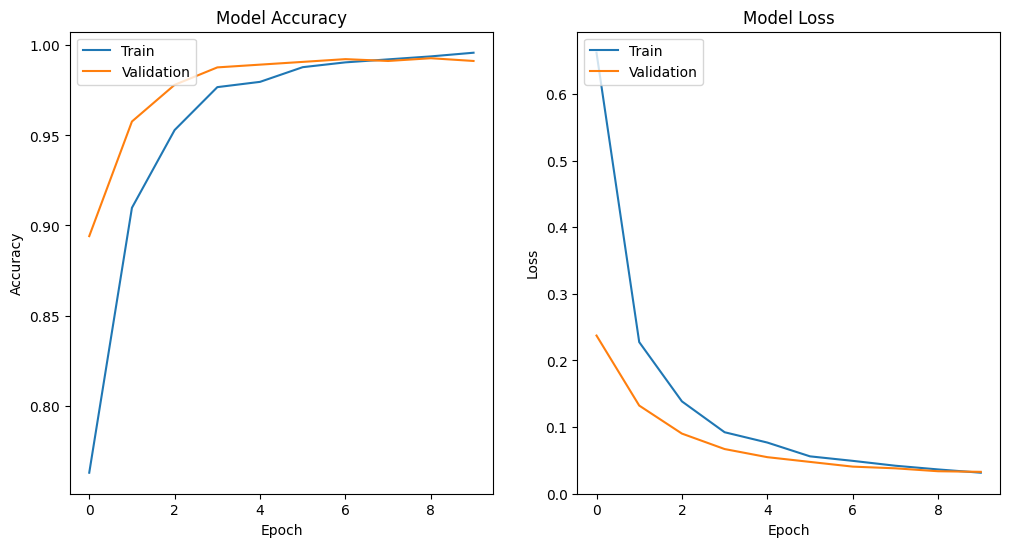

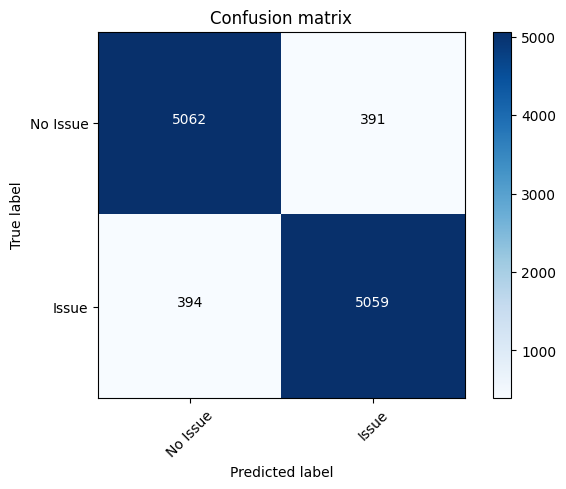

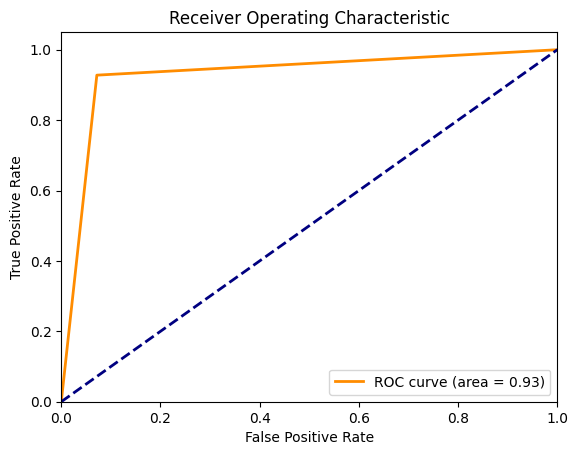

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5453
           1       0.93      0.93      0.93      5453

    accuracy                           0.93     10906
   macro avg       0.93      0.93      0.93     10906
weighted avg       0.93      0.93      0.93     10906



In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
#dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = cnn_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = cnn_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot the confusion matrix and ROC curve
plot_confusion_matrix(all_actuals, all_predictions, classes=["No Issue", "Issue"])
plot_roc_curve(all_actuals, all_predictions)

# Print classification report
print(classification_report(all_actuals, all_predictions))


Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/233562769.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/233562769.py:41: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the file

Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6346 - loss: 0.6430 - val_accuracy: 0.5290 - val_loss: 0.7608
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7888 - loss: 0.4465 - val_accuracy: 0.7025 - val_loss: 0.6067
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8451 - loss: 0.3669 - val_accuracy: 0.7385 - val_loss: 0.5507
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8741 - loss: 0.3182 - val_accuracy: 0.7697 - val_loss: 0.5286
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8972 - loss: 0.2612 - val_accuracy: 0.7874 - val_loss: 0.5238
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9145 - loss: 0.2246 - val_accuracy: 0.7905 - val_loss: 0.5506
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7074 - loss: 0.6869 - val_accuracy: 0.6982 - val_loss: 0.6009
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8246 - loss: 0.403

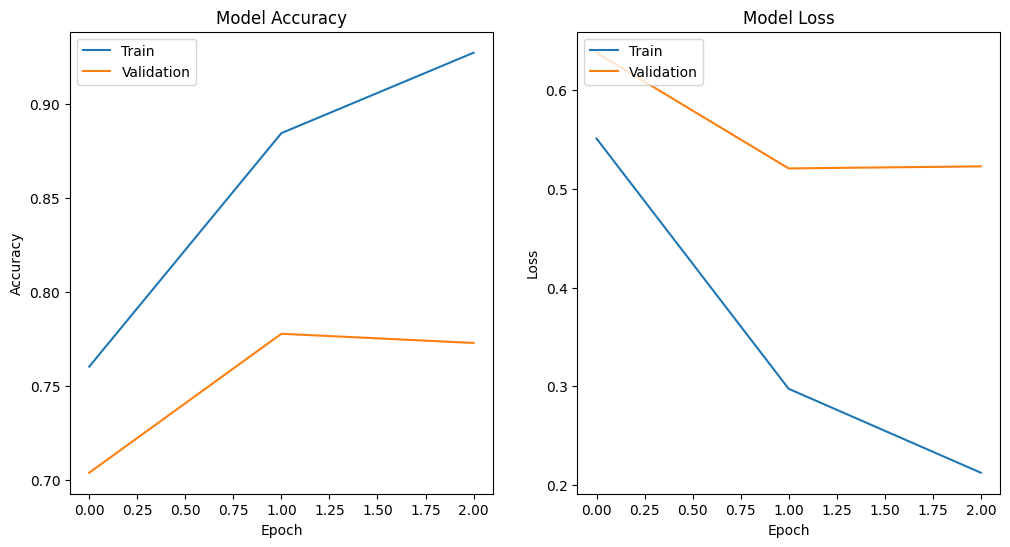

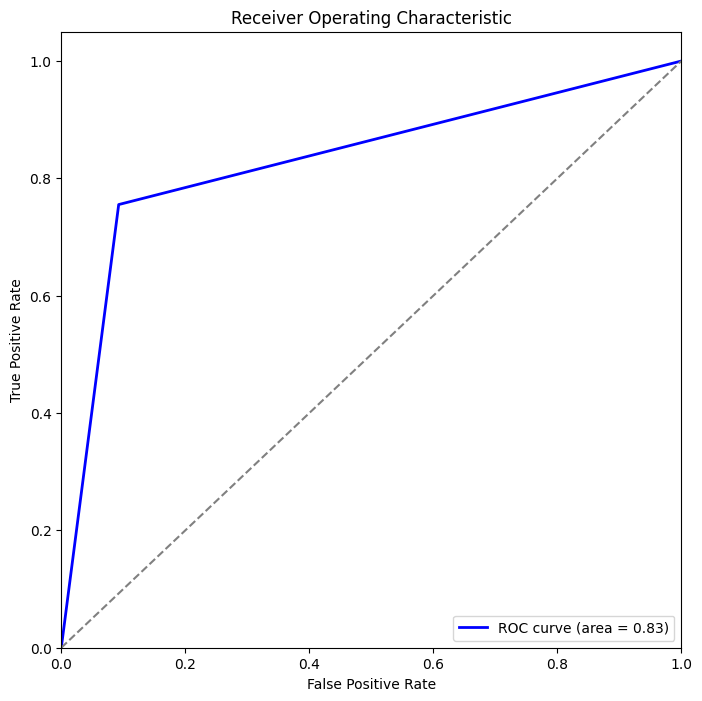

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
#dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = cnn_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = cnn_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals)

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting ROC curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve
plot_roc_curve(all_actuals, all_predictions)


<>:47: SyntaxWarning: invalid escape sequence '\['
<>:47: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/1434700275.py:47: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/1434700275.py:40: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the fi

Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6556 - loss: 0.6396 - val_accuracy: 0.8141 - val_loss: 0.4512
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7942 - loss: 0.4507 - val_accuracy: 0.8426 - val_loss: 0.3767
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8342 - loss: 0.3856 - val_accuracy: 0.8497 - val_loss: 0.3498
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8701 - loss: 0.3160 - val_accuracy: 0.8803 - val_loss: 0.2994
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8901 - loss: 0.2835 - val_accuracy: 0.8884 - val_loss: 0.2799
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9058 - loss: 0.2415 - val_accuracy: 0.9017 - val_loss: 0.2444
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9222 - loss: 0.2106 - val_accuracy: 0.9292 - val_loss: 0.2038
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9399 - loss: 0.1728 - val_accuracy: 0.9414 - v

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6519 - loss: 0.6444 - val_accuracy: 0.8069 - val_loss: 0.4487
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8080 - loss: 0.4388 - val_accuracy: 0.8314 - val_loss: 0.3810
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8366 - loss: 0.3644 - val_accuracy: 0.8558 - val_loss: 0.3320
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8621 - loss: 0.3272 - val_accuracy: 0.8747 - val_loss: 0.3023
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8879 - loss: 0.2786 - val_accuracy: 0.8981 - val_loss: 0.2576
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9106 - loss: 0.2320 - val_accuracy: 0.9068 - val_loss: 0.2441
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9343 - loss: 0.1922 - val_accuracy: 0.9165 - val_loss: 0.2142
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9452 - loss: 0.1613 - val_accuracy: 0.9368 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6499 - loss: 0.6391 - val_accuracy: 0.7998 - val_loss: 0.4497
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8027 - loss: 0.4352 - val_accuracy: 0.8171 - val_loss: 0.4053
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8441 - loss: 0.3697 - val_accuracy: 0.8502 - val_loss: 0.3468
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8772 - loss: 0.3135 - val_accuracy: 0.8747 - val_loss: 0.3090
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8939 - loss: 0.2762 - val_accuracy: 0.8920 - val_loss: 0.2893
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9153 - loss: 0.2334 - val_accuracy: 0.9109 - val_loss: 0.2503
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9285 - loss: 0.1994 - val_accuracy: 0.9241 - val_loss: 0.2326
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9389 - loss: 0.1772 - val_accuracy: 0.9389 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6473 - loss: 0.6446 - val_accuracy: 0.8085 - val_loss: 0.4460
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8068 - loss: 0.4404 - val_accuracy: 0.8207 - val_loss: 0.3983
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8433 - loss: 0.3708 - val_accuracy: 0.8660 - val_loss: 0.3258
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8719 - loss: 0.3175 - val_accuracy: 0.8732 - val_loss: 0.2991
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8889 - loss: 0.2805 - val_accuracy: 0.8951 - val_loss: 0.2732
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9100 - loss: 0.2408 - val_accuracy: 0.9165 - val_loss: 0.2369
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9289 - loss: 0.2017 - val_accuracy: 0.9256 - val_loss: 0.2196
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9359 - loss: 0.1788 - val_accuracy: 0.9404 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6521 - loss: 0.6435 - val_accuracy: 0.7952 - val_loss: 0.4548
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8006 - loss: 0.4369 - val_accuracy: 0.8451 - val_loss: 0.3660
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8417 - loss: 0.3656 - val_accuracy: 0.8696 - val_loss: 0.3251
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8745 - loss: 0.3004 - val_accuracy: 0.8798 - val_loss: 0.3045
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8952 - loss: 0.2723 - val_accuracy: 0.9052 - val_loss: 0.2576
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9156 - loss: 0.2260 - val_accuracy: 0.8996 - val_loss: 0.2671
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6106 - loss: 0.6456 - val_accuracy: 0.7988 - val_loss: 0.4508
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8050 - loss: 0.4398 - val_accuracy: 0.8339 - val_loss: 0.3738
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8403 - loss: 0.3718 - val_accuracy: 0.8426 - val_loss: 0.3639
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8740 - loss: 0.3154 - val_accuracy: 0.8757 - val_loss: 0.3015
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9048 - loss: 0.2676 - val_accuracy: 0.8945 - val_loss: 0.2699
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9185 - loss: 0.2317 - val_accuracy: 0.9052 - val_loss: 0.2514
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9353 - loss: 0.1905 - val_accuracy: 0.9256 - val_loss: 0.2170
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9436 - loss: 0.1692 - val_accuracy: 0.9348 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6218 - loss: 0.6464 - val_accuracy: 0.7856 - val_loss: 0.4682
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7978 - loss: 0.4434 - val_accuracy: 0.8264 - val_loss: 0.3867
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8356 - loss: 0.3745 - val_accuracy: 0.8416 - val_loss: 0.3489
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8657 - loss: 0.3170 - val_accuracy: 0.8697 - val_loss: 0.3147
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8851 - loss: 0.2806 - val_accuracy: 0.8849 - val_loss: 0.2842
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9077 - loss: 0.2390 - val_accuracy: 0.9033 - val_loss: 0.2602
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9211 - loss: 0.2141 - val_accuracy: 0.9140 - val_loss: 0.2317
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9433 - loss: 0.1730 - val_accuracy: 0.9358 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6354 - loss: 0.6395 - val_accuracy: 0.8035 - val_loss: 0.4481
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7996 - loss: 0.4444 - val_accuracy: 0.8254 - val_loss: 0.3865
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8429 - loss: 0.3701 - val_accuracy: 0.8635 - val_loss: 0.3344
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8695 - loss: 0.3085 - val_accuracy: 0.8712 - val_loss: 0.3016
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8941 - loss: 0.2769 - val_accuracy: 0.9022 - val_loss: 0.2669
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9122 - loss: 0.2374 - val_accuracy: 0.9109 - val_loss: 0.2448
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9310 - loss: 0.1976 - val_accuracy: 0.9257 - val_loss: 0.2157
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9396 - loss: 0.1754 - val_accuracy: 0.9328 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6574 - loss: 0.6444 - val_accuracy: 0.8086 - val_loss: 0.4520
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8068 - loss: 0.4363 - val_accuracy: 0.8554 - val_loss: 0.3657
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8402 - loss: 0.3681 - val_accuracy: 0.8539 - val_loss: 0.3457
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8682 - loss: 0.3254 - val_accuracy: 0.8824 - val_loss: 0.2968
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8944 - loss: 0.2806 - val_accuracy: 0.8956 - val_loss: 0.2725
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9142 - loss: 0.2403 - val_accuracy: 0.8992 - val_loss: 0.2571
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9268 - loss: 0.2099 - val_accuracy: 0.9252 - val_loss: 0.2073
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9476 - loss: 0.1699 - val_accuracy: 0.9384 - val_loss: 0.

/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6281 - loss: 0.6490 - val_accuracy: 0.8040 - val_loss: 0.4550
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7993 - loss: 0.4508 - val_accuracy: 0.8386 - val_loss: 0.3700
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8382 - loss: 0.3770 - val_accuracy: 0.8651 - val_loss: 0.3258
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8692 - loss: 0.3279 - val_accuracy: 0.8768 - val_loss: 0.2898
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8875 - loss: 0.2822 - val_accuracy: 0.8961 - val_loss: 0.2613
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9071 - loss: 0.2437 - val_accuracy: 0.9043 - val_loss: 0.2446
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9175 - loss: 0.2149 - val_accuracy: 0.9216 - val_loss: 0.2151
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9413 - loss: 0.1807 - val_accuracy: 0.9369 - val_loss: 0.

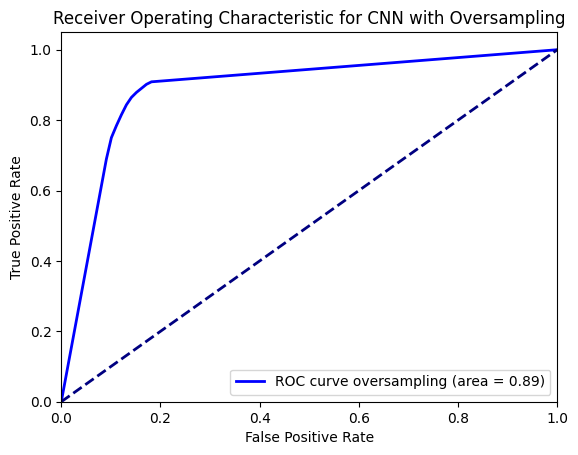

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5453
           1       0.88      0.90      0.89      5453

    accuracy                           0.89     10906
   macro avg       0.89      0.89      0.89     10906
weighted avg       0.89      0.89      0.89     10906



In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply oversampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predicted_targets = []
    all_actual_targets = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        model = build_CNN_model()
        model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Evaluate the model
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = model.predict(test_sequences_matrix).round().flatten()

        # ROC Curve
        fpr, tpr, _ = roc_curve(Test_Y, predictions)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        # Store actual and predicted values
        all_predicted_targets.extend(predictions)
        all_actual_targets.extend(Test_Y)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc, all_predicted_targets, all_actual_targets

# Get ROC data
mean_fpr_over, mean_tpr_over, mean_auc_over, all_predictions_over, all_actuals_over = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Plot ROC Curve
plt.figure()
plt.plot(mean_fpr_over, mean_tpr_over, color='blue', lw=2, label='ROC curve oversampling (area = %0.2f)' % mean_auc_over)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for CNN with Oversampling')
plt.legend(loc="lower right")
plt.show()

# Print classification report for oversampling
print(classification_report(all_actuals_over, all_predictions_over))


Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.


<>:48: SyntaxWarning: invalid escape sequence '\['
<>:48: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/2334020836.py:48: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/2334020836.py:41: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the fi

Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6247 - loss: 0.6409 - val_accuracy: 0.6536 - val_loss: 0.6199
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7970 - loss: 0.4444 - val_accuracy: 0.7587 - val_loss: 0.5176
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8498 - loss: 0.3551 - val_accuracy: 0.7355 - val_loss: 0.5532
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6441 - loss: 0.6375 - val_accuracy: 0.7288 - val_loss: 0.5100
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7967 - loss: 0.4591 - val_accuracy: 0.8186 - val_loss: 0.4308
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8397 - loss: 0.3695 - val_accuracy: 0.7550 - val_loss: 0.5280
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6276 - loss: 0.6380 - val_accuracy: 0.6426 - val_loss: 0.6247
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8014 - loss: 0.4417 - val_accuracy: 0.6976 - val_loss: 0.6158
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8294 - loss: 0.3707 - val_accuracy: 0.7257 - val_loss: 0.5889
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8770 - loss: 0.3068 - val_accuracy: 0.7233 - val_loss: 0.6266
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6491 - loss: 0.6344 - val_accuracy: 0.5675 - val_loss: 0.7351
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7896 - loss: 0.4552 - val_accuracy: 0.6659 - val_loss: 0.6594
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8563 - loss: 0.3497 - val_accuracy: 0.7300 - val_loss: 0.5655
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8709 - loss: 0.3140 - val_accuracy: 0.7795 - val_loss: 0.4845
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8935 - loss: 0.2757 - val_accuracy: 0.7923 - val_loss: 0.4862
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6298 - loss: 0.6442 - val_accuracy: 0.5870 - val_loss: 0.6787
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7856 - loss: 0.4589 - val_accuracy: 0.6640 - val_loss: 0.6464
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8423 - loss: 0.3555 - val_accuracy: 0.7092 - val_loss: 0.6088
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8661 - loss: 0.3069 - val_accuracy: 0.7184 - val_loss: 0.6124
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6285 - loss: 0.6359 - val_accuracy: 0.6933 - val_loss: 0.5746
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7913 - loss: 0.4544 - val_accuracy: 0.7178 - val_loss: 0.6007
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6338 - loss: 0.6352 - val_accuracy: 0.6768 - val_loss: 0.5973
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7952 - loss: 0.4472 - val_accuracy: 0.6616 - val_loss: 0.6652
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6294 - loss: 0.6423 - val_accuracy: 0.6506 - val_loss: 0.6016
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7903 - loss: 0.4503 - val_accuracy: 0.6903 - val_loss: 0.6265
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6400 - loss: 0.6344 - val_accuracy: 0.5522 - val_loss: 0.7328
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8034 - loss: 0.4350 - val_accuracy: 0.7642 - val_loss: 0.5176
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8453 - loss: 0.3646 - val_accuracy: 0.6952 - val_loss: 0.6349
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6166 - loss: 0.6442 - val_accuracy: 0.5974 - val_loss: 0.6758
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7854 - loss: 0.4578 - val_accuracy: 0.7251 - val_loss: 0.5898
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8462 - loss: 0.3647 - val_accuracy: 0.7685 - val_loss: 0.5108
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8701 - loss: 0.3183 - val_accuracy: 0.6976 - val_loss: 0.6544
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


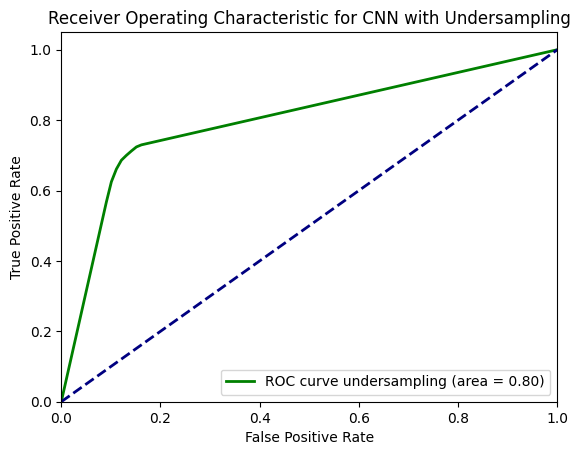

              precision    recall  f1-score   support

           0       0.76      0.88      0.81      4546
           1       0.86      0.72      0.78      4546

    accuracy                           0.80      9092
   macro avg       0.81      0.80      0.80      9092
weighted avg       0.81      0.80      0.80      9092



In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']
undersampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model_under = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency_under(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score_under = []
    all_predictions_under = []
    all_actuals_under = []
    tprs_under = []
    mean_fpr_under = np.linspace(0, 1, 100)

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Compile and train the model
        model = build_CNN_model()
        model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Evaluate the model
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = model.predict(test_sequences_matrix).round().flatten()

        # ROC Curve
        fpr, tpr, _ = roc_curve(Test_Y, predictions)
        tprs_under.append(np.interp(mean_fpr_under, fpr, tpr))
        tprs_under[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        
        # Store actual and predicted values
        all_predictions_under.extend(predictions)
        all_actuals_under.extend(Test_Y)

    mean_tpr_under = np.mean(tprs_under, axis=0)
    mean_tpr_under[-1] = 1.0
    mean_auc_under = auc(mean_fpr_under, mean_tpr_under)

    return mean_fpr_under, mean_tpr_under, mean_auc_under, all_predictions_under, all_actuals_under

# Get ROC data for undersampling
mean_fpr_under, mean_tpr_under, mean_auc_under, all_predictions_under, all_actuals_under = get_dataset_words_frequency_under(X_resampled_under, y_resampled_under, max_words, max_len)

# Plot ROC Curve for Undersampling
plt.figure()
plt.plot(mean_fpr_under, mean_tpr_under, color='green', lw=2, label='ROC curve undersampling (area = %0.2f)' % mean_auc_under)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for CNN with Undersampling')
plt.legend(loc="lower right")
plt.show()

# Print classification report for undersampling
print(classification_report(all_actuals_under, all_predictions_under))


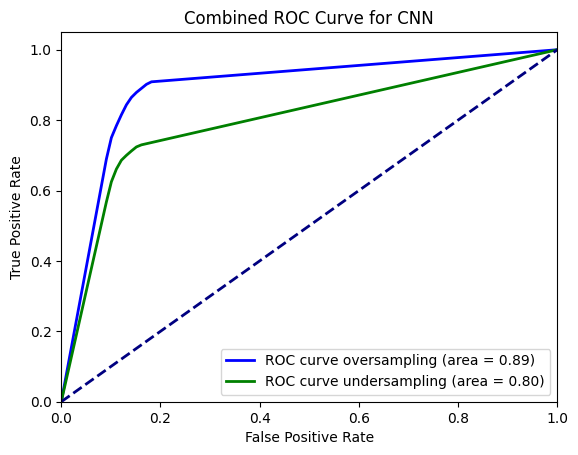

In [7]:
import matplotlib.pyplot as plt

# Make sure to run the oversampling and undersampling code blocks before this to get the ROC data
plt.figure()
plt.plot(mean_fpr_over, mean_tpr_over, color='blue', lw=2, label='ROC curve oversampling (area = %0.2f)' % mean_auc_over)
plt.plot(mean_fpr_under, mean_tpr_under, color='green', lw=2, label='ROC curve undersampling (area = %0.2f)' % mean_auc_under)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for CNN')
plt.legend(loc="lower right")

# Save the plot
plt.savefig('combined_roc_curve.png', dpi=300)

plt.show()


<>:47: SyntaxWarning: invalid escape sequence '\['
<>:47: SyntaxWarning: invalid escape sequence '\['
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/1068684607.py:47: SyntaxWarning: invalid escape sequence '\['
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>
[nltk_data] Error loading wordnet: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 61] Connection refused>
[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 61]
[nltk_data]     Connection refused>
/var/folders/y0/23chrxcn0d9dv4pxp6v708kr0000gn/T/ipykernel_4740/1068684607.py:40: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the fi

Dataset loaded.
Index(['Unnamed: 0', 'userName', 'Title', 'Base_Reviews', 'Rating',
       'cleaned_Review', 'Have_Issue', 'Assessability Issue Type'],
      dtype='object')
NLTK data downloaded.
Epoch 1/10


/Users/nekdilkhan/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6304 - loss: 0.6433 - val_accuracy: 0.5846 - val_loss: 0.6849
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7916 - loss: 0.4514 - val_accuracy: 0.7715 - val_loss: 0.5025
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8438 - loss: 0.3612 - val_accuracy: 0.7697 - val_loss: 0.5130
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7227 - loss: 0.5695 - val_accuracy: 0.6133 - val_loss: 0.7158
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8171 - loss: 0.4120 - val_accuracy: 0.7355 - val_loss: 0.5499
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8606 - loss: 0.3378 - val_accuracy: 0.7416 - val_loss: 0.5667
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7037 - loss: 0.6022 - val_accuracy: 0.6811 - val_loss: 0.6303
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 33m

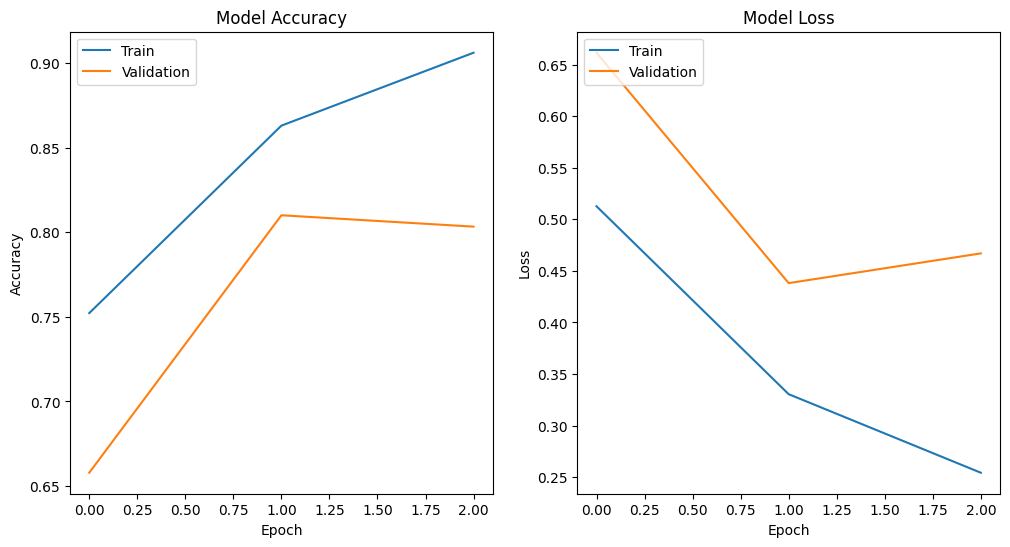

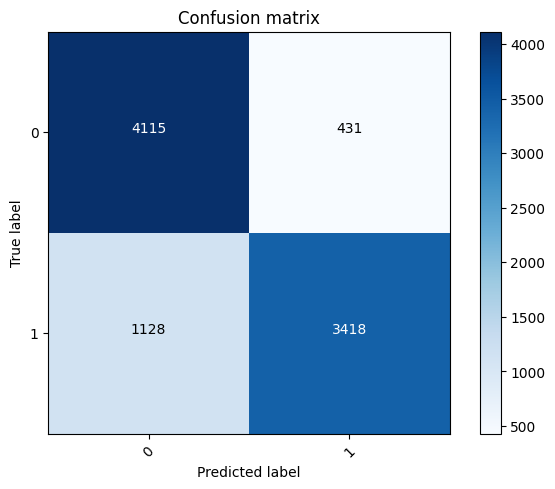

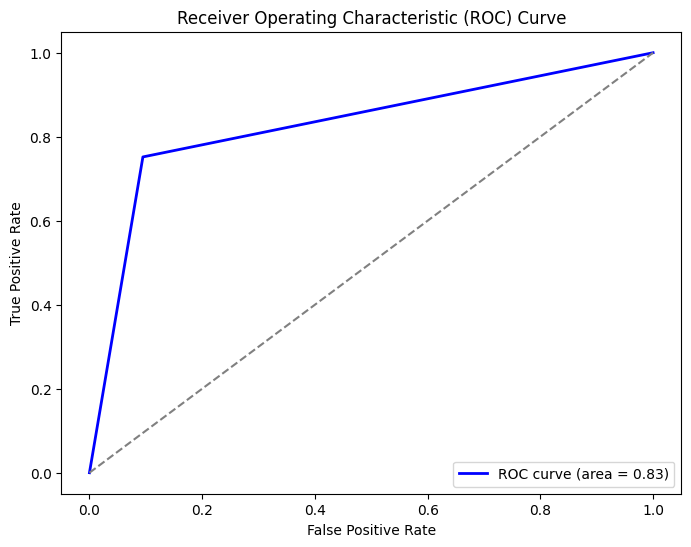

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import itertools
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Load your dataset
dataset = pd.read_csv('Accessibility issues new.csv', encoding='latin-1')
print("Dataset loaded.")
print(dataset.columns)
# Remove rows where the target variable has missing values
dataset = dataset.dropna(subset=['Have_Issue'])

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('omw-1.4')
print("NLTK data downloaded.")

# Define preprocessing functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    return re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

def clean_text(text):
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#?+_]')
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    return text

# Preprocess dataset
dataset['Base_Reviews'] = dataset['Base_Reviews'].apply(clean_text)
dataset['Base_Reviews'].dropna(inplace=True)
dataset['Base_Reviews'] = [entry.lower() for entry in dataset['Base_Reviews']]
dataset['Base_Reviews'] = [word_tokenize(entry) for entry in dataset['Base_Reviews']]

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index, entry in enumerate(dataset['Base_Reviews']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            Final_words.append(word_Final)
    dataset.loc[index, 'text_final'] = str(Final_words)

# Map 'Yes'/'No' to 1/0
dataset['Have_Issue'] = dataset['Have_Issue'].map({'Yes': 1, 'No': 0})

# Apply undersampling to balance the classes
X = dataset['text_final']
y = dataset['Have_Issue']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(np.array(X).reshape(-1, 1), y)

# Set parameters for the model
max_words = 1000
max_len = 150

# Define the CNN model
def build_CNN_model():
    model = Sequential()
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(Conv1D(256, 3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the model
cnn_model = build_CNN_model()

# Function to perform training and evaluation
def get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len):
    k = 10
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    acc_score = []
    all_predictions = []
    all_actuals = []

    for train_index, test_index in kf.split(X_resampled):
        Train_X, Test_X = X_resampled[train_index], X_resampled[test_index]
        Train_Y, Test_Y = y_resampled[train_index], y_resampled[test_index]

        Train_X = [x[0] for x in Train_X]
        Test_X = [x[0] for x in Test_X]

        # Tokenization and padding of sequences
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(Train_X)
        sequences = tok.texts_to_sequences(Train_X)
        sequences_matrix = pad_sequences(sequences, maxlen=max_len)

        # Train the model
        history = cnn_model.fit(sequences_matrix, Train_Y, batch_size=100, epochs=10, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])
        
        # Predict and evaluate
        test_sequences = tok.texts_to_sequences(Test_X)
        test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)
        predictions = cnn_model.predict(test_sequences_matrix).round().flatten()
        acc_score.append(accuracy_score(Test_Y, predictions))
        all_predictions.extend(predictions)
        all_actuals.extend(Test_Y)

    avg_acc_score = sum(acc_score) / k
    print('Avg accuracy : {}'.format(avg_acc_score))
    return history, np.array(all_predictions), np.array(all_actuals), avg_acc_score

# Train the model and get the history object, predictions, and actual values
history, all_predictions, all_actuals, avg_acc_score = get_dataset_words_frequency(X_resampled, y_resampled, max_words, max_len)

# Print average accuracy score
print("Average accuracy score from cross-validation: {:.4f}".format(avg_acc_score))

# Classification report
print("\nClassification Report:")
print(classification_report(all_actuals, all_predictions))

# Plot training and validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(all_actuals, all_predictions, classes=[0, 1])

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve
plot_roc_curve(all_actuals, all_predictions)
